# 北尾早霧・砂川武貴・山田知明『定量的マクロ経済学と数値計算』日本評論社
## 第2章：2期間モデルと数値計算の概観

## 2.6 内生的格子法（Endogenous Gridpoint Method）
* 説明書きはこれから

In [1]:
class Models:
    def __init__(self,β:float,γ:float,rent:float,na:int,a_max:float,a_min:float,grid_a:"np.ndarray[np.float64]"):
        # パラメータ
        self.β = β # 割引因子
        self.γ = γ # 相対的危険回避度

        # 要素価格
        self.rent = rent # 純利子率

        # グリッド
        self.na = na #貯蓄グリッドの数
        self.a_max = a_max # 貯蓄グリッドの最大値
        self.a_min = a_min # 貯蓄グリッドの最小値
        self.grid_a = grid_a # 貯蓄グリッド

In [7]:
def Calibration():
    # パラメータはここで設定をする
    β = 0.985**30
    γ = 2.0
    rent = 1.025**30 - 1.0
    na = 11
    a_max = 0.4
    a_min = 0.0

    grid_a = np.linspace(a_min,a_max,na)

    return Models(β, γ, rent, na, a_max, a_min, grid_a)

---

In [19]:
# 使う関数を呼び出す
import numpy as np # 配列を扱うためのパッケージ
import matplotlib.pyplot as plt # プロットを行うためのパッケージ
import japanize_matplotlib # プロットで日本語を使うためのパッケージ

---

In [8]:
params = Calibration()

In [9]:
def mu_CRRA(cons,γ):
    return cons**(-γ)

### オイラー方程式の右辺

In [13]:
def rhs_euler(a,params):

    # 老年期の限界効用
    mu = mu_CRRA((1.0+params.rent)*a, params.γ)

    # オイラー方程式の右辺
    return params.β*(1.0 + params.rent)*mu

### CRRA型効用関数の逆関数

In [12]:
def inv_mu_CRRA(mu,γ):
    return mu**(-1/γ)

## 計算アルゴリズムのメインパート
* OptimizationやRootを探すといった事を一切していない！

In [14]:
rhs = np.zeros(params.na)
cons = np.zeros(params.na)

for i in range(params.na):
    rhs[i] = rhs_euler(params.grid_a[i], params)
    cons[i] = inv_mu_CRRA(rhs[i], params.γ)

C:\Users\sakan\AppData\Local\Temp\ipykernel_24336\2903694489.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return cons**(-γ)


## 予算制約からwを逆算する

In [17]:
w = np.zeros(params.na)
for i in range(params.na):
    w[i] = cons[i] + params.grid_a[i]

print(w)

[0.         0.11267324 0.22534648 0.33801972 0.45069295 0.56336619
 0.67603943 0.78871267 0.90138591 1.01405915 1.12673239]


## 計算結果を出力

In [18]:
# 解析解
# テキストの(2.4)式
coef1 = (params.β*(1.0+params.rent))**(-1.0/params.γ)
coef2 = 1.0/(1.0+coef1*(1.0+params.rent))
a_cfs = coef2*w

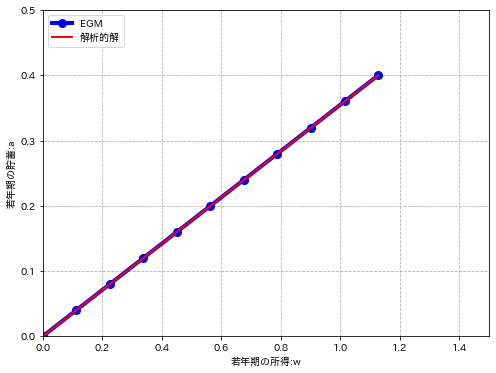

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(w,params.grid_a,c="b",marker="o",lw=4,ms=8,label="EGM")
ax.plot(w,a_cfs,c="r",lw=2,label="解析的解")
ax.set(xlabel="若年期の所得:w",ylabel="若年期の貯蓄:a",xlim=(0,1.5),ylim=(0,0.5))
ax.legend(loc="upper left")
ax.grid(ls="--")
plt.show()

---

## エクササイズ
* 